# On the importance of the bias term
Why is the bias ter necessary in neural networks and how does it affect the overall model expressivity.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
%matplotlib inline
mpl.style.use('seaborn')

Let's pick two random samples and name them "red" and "green" for the sake of readability.

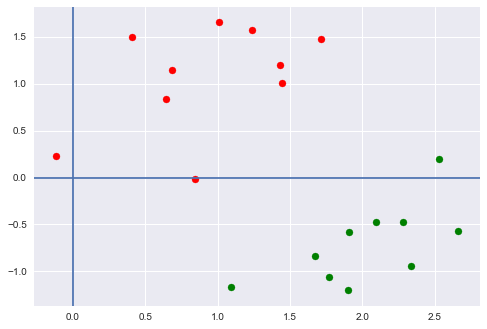

In [2]:
num_samples = 10 # number of samples to draw from each element
np.random.seed(1234) # random seed for reproducibiliry
red_x1 = 0.5*np.random.randn(num_samples) + 1 # mean 1, std. dev. 0.5
red_x2 = 0.5*np.random.randn(num_samples) + 1 # mean 1, std. dev. 0.5
green_x1 = 0.5*np.random.randn(num_samples) + 2 # mean 2, std. dev. 0.5
green_x2 = 0.5*np.random.randn(num_samples) + (-1) # mean -1, std. dev. 0.5
# Ploting the points
plt.scatter(red_x1,red_x2, c='r')
plt.scatter(green_x1,green_x2, c='g')
plt.axhline()
plt.axvline()
plt.show()

Now, let's construct two linear separators:
* A: $x_2 = wx_1$ 
* B: $x_2 = wx_1 + b$

This is the slice in $z = 0$ of:
$$z = w_1x_1 + w_2x_2+b$$
where $w_1 = w$ and $w_2 = -1$.

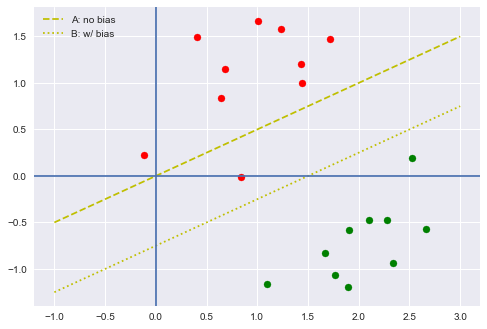

In [3]:
w = 0.5 # w_1
b = -0.75 # bias
x1 = np.linspace(-1,3,50) # separator x1
x2a = w*x1 # separator A x_2
x2b = w*x1+b # separator B x_2
# PLot
plt.scatter(red_x1,red_x2, c='r')
plt.scatter(green_x1,green_x2, c='g')
plt.plot(x1,x2a,'y--', label='A: no bias')
plt.plot(x1,x2b,'y:', label='B: w/ bias')
plt.axhline()
plt.axvline()
plt.legend()
plt.show()

There are two interesting observations here.

First, this specific data set is clearly linearly separable. Without the bias term, it would be impossible to draw a line that separates all points. This gives us some clue that adding a bias helps you find a better linear separator.

Second, according to [Goodfellow et al. 2016](http://www.deeplearningbook.org/contents/ml.html):

>"The intercept term is often called the bias parameter of the aﬃne transformation. This terminology derives from the point of view that the output of the transformation is biased toward being b in the absence of any input."

Now, let us probe the point (0,0):
* For separator A, $a = \sigma(0.5\cdot0+(-1)\cdot0) = 0.5$
* For separator B, $a = \sigma(0.5\cdot0+(-1)\cdot0+(-0.75)) = 0.3208$

In other words, in the abscence of any input, classificator A would predict either of the two colors with 50% probability, while classificator B would predict with about 68% probability the color red (32.08% probability of being green). 